Importer les bibliothèques:

In [118]:
import numpy as np
import pandas as pd
import  re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,f1_score
from wordcloud import WordCloud 
from nltk.stem import WordNetLemmatizer
import pickle

In [92]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [94]:
#Affichages des 'Stopworsds'
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data processing

In [95]:
#loading the data from csv file to pandas 
twitter_data=pd.read_csv('datasets\Twitter-Sentiments.csv',encoding='ISO-8859-1')
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [96]:
#naming the columns and reading the dataset again
columns_name=['target','id','date','flag','user','text']
twitter_data=pd.read_csv('datasets\Twitter-Sentiments.csv',names=columns_name,encoding='ISO-8859-1')
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [97]:
#affichage de nombre des lignes et des colonnes
twitter_data.shape

(1600000, 6)

In [98]:
#le nombre des valeurs manquants (missing values)
twitter_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [99]:
#Suppresion des colonnes inutiles
twitter_data=twitter_data.drop(columns=['date','flag','user'])
twitter_data.head()

,target,id,text
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,is upset that he can't update his Facebook by ...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,my whole body feels itchy and like its on fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all...."


In [100]:
#la distrubition des classes
twitter_data['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [101]:
#Convertion de 'target' 4 à 1
twitter_data.replace({'target':{4:1}},inplace=True)

In [102]:
#Checking the distribution of target column
twitter_data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

0--->Negative 

1--->Positif tweet

Racinisation (Stemming):

In [103]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmitizer(content):
    lemmitized_content = re.sub('[^a-zA-Z]', ' ', content)# Supprimer les caractères non alphabétiques
    # Supprimer les adresses URL
    content = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', content)
    content = content.lower()
    # Tokenization
    tokens = content.split()
    # Lemmatisation et suppression des mots vides
    lemmitized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    # Reconstruction du texte
    lemmitized_text = ' '.join(lemmitized_tokens)
    return lemmitized_text


In [105]:
# Appliquer la fonction de racinisation à la colonne 'text' et créer une nouvelle colonne 'stemmed_content'
# Appliquer la fonction de lemmatisation à la colonne 'text' et créer une nouvelle colonne 'lemmitized_content'
twitter_data['lemmitized_content'] = twitter_data['text'].apply(lemmitizer)


In [106]:
twitter_data.head()

,target,id,text,lemmitized_content
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot awww, that's bummer. shoulda got d..."
1,0,1467810672,is upset that he can't update his Facebook by ...,upset can't update facebook texting it... migh...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...,@kenichan dived many time ball. managed save 5...
3,0,1467811184,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, behaving all. i'm mad. he..."


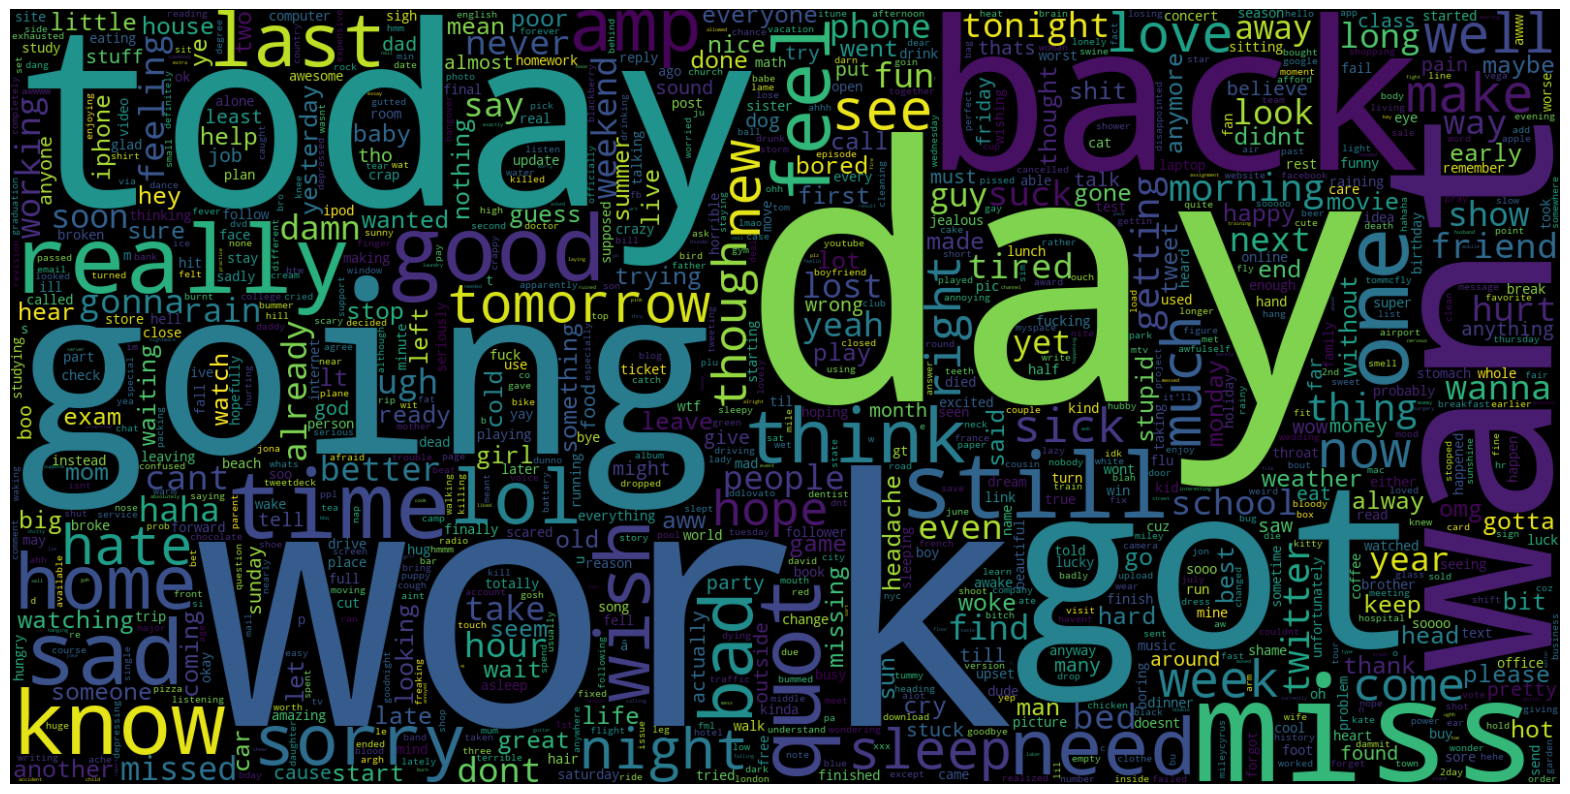

In [107]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

# Filtrer les données pour ne contenir que les données ayant pour target la valeur 0 (négatif)
data_neg = twitter_data[twitter_data['target'] == 0]['lemmitized_content']

# Créer un nuage de mots à partir des données négatives
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_neg))

# Afficher le nuage de mots
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


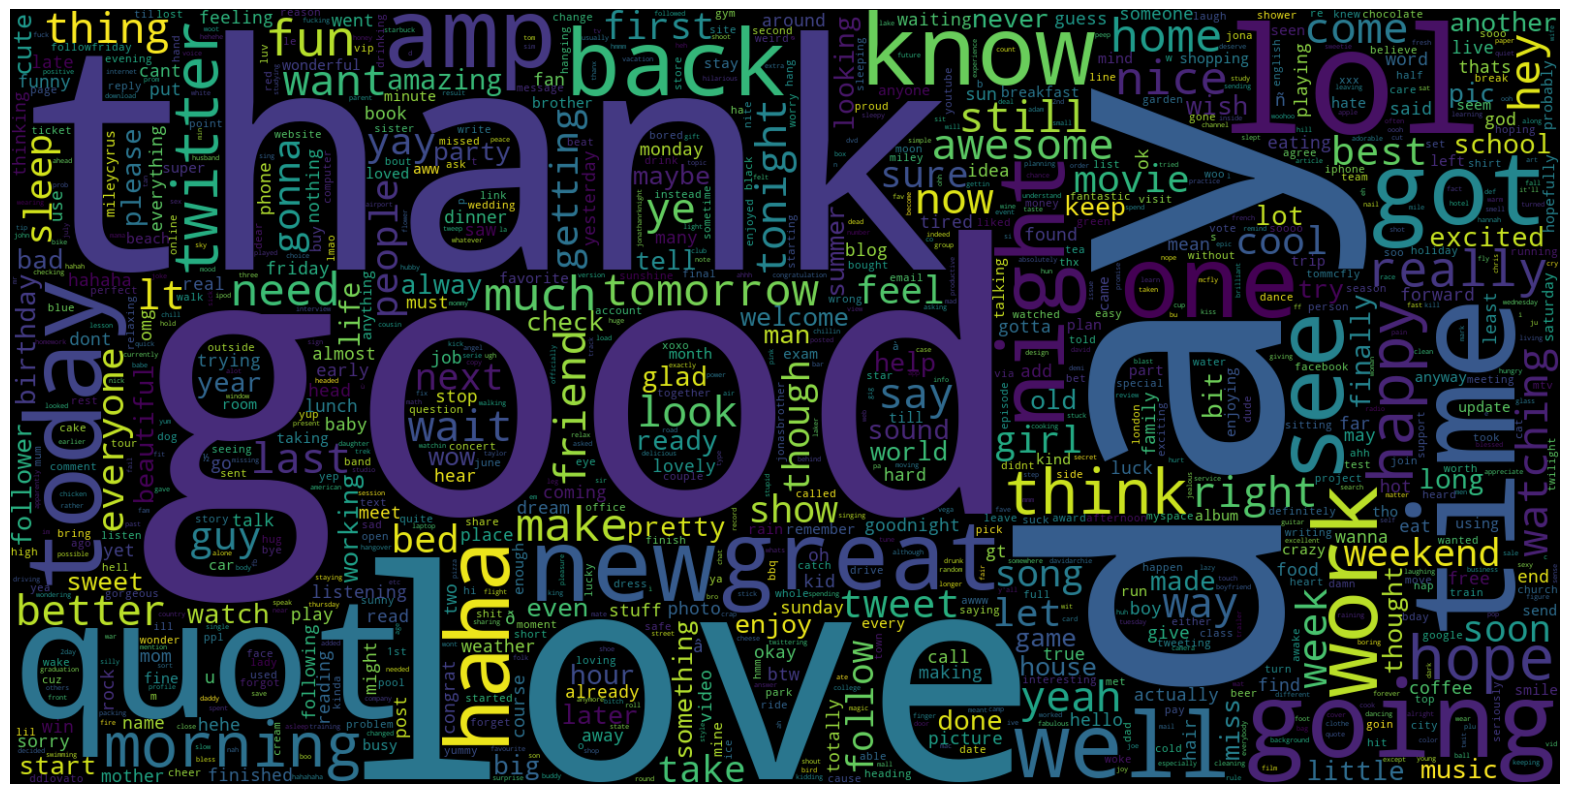

In [108]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

# Filtrer les données pour ne contenir que les données ayant pour target la valeur 0 (négatif)
data_neg = twitter_data[twitter_data['target'] == 1]['lemmitized_content']

# Créer un nuage de mots à partir des données négatives
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_neg))

# Afficher le nuage de mots
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [110]:
#Separation 
X=twitter_data['lemmitized_content'].values #variable indepandantes
Y=twitter_data['target'].values #variable cible

In [111]:
#Spliting the data to training and test data
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [112]:
#Converting the textual  data to numerical data 
vectorizer= TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [113]:
print(X_train)

  (0, 515499)	0.5075805009959469
  (0, 279786)	0.4769130100873701
  (0, 138356)	0.458907614267841
  (0, 414976)	0.40506958687182143
  (0, 508405)	0.3744842415597722
  (1, 216970)	0.42217397977710586
  (1, 196602)	0.9065148265743698
  (2, 340810)	0.16390587366866624
  (2, 164639)	0.20125111533226006
  (2, 185284)	0.18355256628995859
  (2, 477956)	0.1497208017350529
  (2, 316110)	0.23717815146316432
  (2, 515894)	0.36193499506288024
  (2, 101512)	0.30616263658351656
  (2, 504943)	0.3219786154154065
  (2, 474859)	0.3243367400721321
  (2, 161445)	0.285061859422619
  (2, 475827)	0.1826298765402079
  (2, 155465)	0.19079291490724562
  (2, 138356)	0.48544679650954403
  (3, 209668)	0.3853593574700954
  (3, 480563)	0.2669233203325206
  (3, 454740)	0.38892120157121046
  (3, 76713)	0.5126063144136759
  (3, 186485)	0.2749863341779847
  :	:
  (1279996, 373491)	0.22977271487137665
  (1279996, 283133)	0.22848294293895266
  (1279996, 343653)	0.17409826669456088
  (1279996, 481747)	0.18302511207038014
 

Training the maching learning model

In [114]:
#Logstic regression
model =LogisticRegression(max_iter=1000)

In [115]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

Evaluation

In [116]:
#accuracy score 
Y_predict=model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_predict)
accuracy

0.78565

In [119]:
#prescision
precision=precision_score(Y_test,Y_predict)
precision


0.7755909310178485

In [120]:
f1_score=f1_score(Y_test,Y_predict)
f1_score

0.7894917751043456

Model accuracy is 78%

Saving the model 

In [121]:

filename= 'model_Tweets.sav'
pickle.dump(model,open(filename,'wb'))

In [124]:

# Charger le modèle entraîné à partir du fichier
filename = 'model_Tweets.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Nouvelle observation à prédire
new_text = "I like this movie! It's amazing."

# Appliquer la fonction de racinisation à la nouvelle observation
lemmatized_new_text = lemmitizer(new_text)

# Convertir le texte prétraité en représentation vectorielle à l'aide du vectorizer utilisé lors de l'entraînement
vectorized_new_text = vectorizer.transform([lemmatized_new_text])

# Prédire le sentiment de la nouvelle observation
prediction = loaded_model.predict(vectorized_new_text)

# Afficher le résultat de la prédiction
if prediction == 0:
    print("Sentiment négatif.")
else:
    print("Sentiment positif.")




Sentiment positif.
